In [1]:
import sys
sys.path.append('../')

from model import Model
import torch

In [2]:
kline_size = 10
hidden_layer = 10
column_number = 6
features_number = 0

net = torch.nn.Sequential(
    torch.nn.Linear(column_number * kline_size + features_number, hidden_layer, dtype=torch.float64),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_layer, 1, dtype=torch.float64),
    torch.nn.Tanh()
)

model = Model(net)
model.addDescription(
    {
        'model':
        {
            'scheme':
            [
                ['linear', column_number * kline_size + features_number, hidden_layer],
                'ReLU',
                ['linear', hidden_layer, 1],
                'Tanh'
            ]
        }
    }
)

In [3]:
from dataset.preprocess import Preprocessor

description = {'filename': '../../tmp/trainingData', 'symbol': 'BTCUSDT', 'interval': '1m', 'startTime': 1618012800000, 'endTime': 1620264060000}
model.loadDataset(description, Preprocessor(kline_size, column_number))
model.addDescription({'dataset': description})
model.addDescription({'preprocessor': 'Basic preprocessor, 0 features'})

  0%|          | 0/2251260001 [00:00<?, ?it/s]/home/csud/kursach2024/example/model/../dataset/data_loader.py:47: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, croppedBatch], ignore_index=True)
2251320000it [00:16, 139470433.88it/s]                                


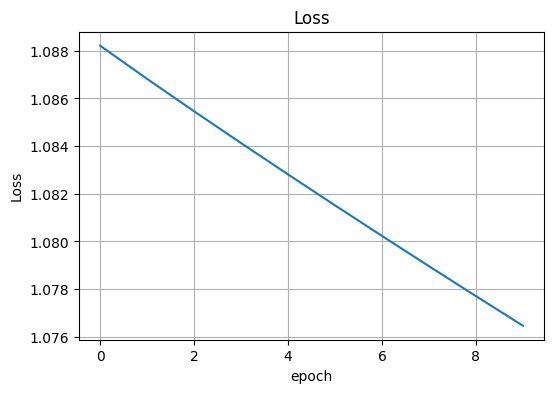

100%|██████████| 10/10 [00:24<00:00,  2.40s/it]


In [4]:
lr = 0.00001

model.fit(
    torch.optim.Adam(net.parameters(), lr),
    torch.nn.MSELoss(),
)
model.addDescription({'model': {'optimizer': ['Adam', {'lr': lr}]}})
model.addDescription({'model': {'loss': 'MSE'}})

In [5]:
model.dumpDescription('../../tmp/run_result.json')